<a href="https://colab.research.google.com/github/stevemorrisbi/TopTransfers/blob/main/ff_new_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
# Request Liabrary can pull a reponse from an API
import requests
week_four = requests.get('https://fantasy.premierleague.com/api/entry/1339013/event/4/picks/').text
week_three = requests.get('https://fantasy.premierleague.com/api/entry/1339013/event/3/picks/').text
week_two = requests.get('https://fantasy.premierleague.com/api/entry/1339013/event/2/picks/').text
week_one = requests.get('https://fantasy.premierleague.com/api/entry/1339013/event/1/picks/').text

In [7]:
# This response is in JSON
week_four

'{"active_chip":null,"automatic_subs":[],"entry_history":{"event":4,"points":85,"total_points":269,"rank":1263083,"rank_sort":1274474,"overall_rank":254874,"bank":12,"value":1013,"event_transfers":1,"event_transfers_cost":0,"points_on_bench":5},"picks":[{"element":101,"position":1,"multiplier":1,"is_captain":false,"is_vice_captain":false},{"element":511,"position":2,"multiplier":1,"is_captain":false,"is_vice_captain":false},{"element":195,"position":3,"multiplier":1,"is_captain":false,"is_vice_captain":false},{"element":131,"position":4,"multiplier":1,"is_captain":false,"is_vice_captain":false},{"element":108,"position":5,"multiplier":1,"is_captain":false,"is_vice_captain":true},{"element":143,"position":6,"multiplier":1,"is_captain":false,"is_vice_captain":false},{"element":19,"position":7,"multiplier":1,"is_captain":false,"is_vice_captain":false},{"element":396,"position":8,"multiplier":1,"is_captain":false,"is_vice_captain":false},{"element":14,"position":9,"multiplier":1,"is_captai

In [8]:
type(week_four)

str

In [9]:
import json
# Parse the JSON data
week_four_data = json.loads(week_four)
week_three_data = json.loads(week_three)
week_two_data = json.loads(week_two)
week_one_data = json.loads(week_one)

# Access 'entry_history' from the parsed data and convert it into a DataFrame
week_four_df = pd.DataFrame([week_four_data['entry_history']])
week_three_df = pd.DataFrame([week_three_data['entry_history']])
week_two_df = pd.DataFrame([week_two_data['entry_history']])
week_one_df = pd.DataFrame([week_one_data['entry_history']])

# Display the DataFrame
print(week_four_df)
print(week_three_df)
print(week_two_df)
print(week_one_df)

   event  points  total_points     rank  rank_sort  overall_rank  bank  value  \
0      4      85           269  1263083    1274474        254874    12   1013   

   event_transfers  event_transfers_cost  points_on_bench  
0                1                     0                5  
   event  points  total_points     rank  rank_sort  overall_rank  bank  value  \
0      3      42           184  5181362    5194369        589331     9   1007   

   event_transfers  event_transfers_cost  points_on_bench  
0                2                     0               10  
   event  points  total_points   rank  rank_sort  overall_rank  bank  value  \
0      2      73           142  84645      85705        206434     0   1002   

   event_transfers  event_transfers_cost  points_on_bench  
0                0                     0               10  
   event  points  total_points     rank  rank_sort  overall_rank  bank  value  \
0      1      69            69  3163317    3211397       3163317     0   1

In [10]:
# Concatenate them vertically (row-wise) into one DataFrame
merged_df = pd.concat([week_one_df, week_two_df, week_three_df, week_four_df], ignore_index=True)

# 'ignore_index=True' resets the index of the merged DataFrame to start from 0

# Display the merged DataFrame
print(merged_df)

   event  points  total_points     rank  rank_sort  overall_rank  bank  value  \
0      1      69            69  3163317    3211397       3163317     0   1000   
1      2      73           142    84645      85705        206434     0   1002   
2      3      42           184  5181362    5194369        589331     9   1007   
3      4      85           269  1263083    1274474        254874    12   1013   

   event_transfers  event_transfers_cost  points_on_bench  
0                0                     0                5  
1                0                     0               10  
2                2                     0               10  
3                1                     0                5  


In [11]:
df = pd.DataFrame(merged_df)

# Rename the "event" column values
event_mapping = {1: "Week 1", 2: "Week 2", 3: "Week 3", 4: "Week 4"}
df["event"] = df["event"].map(event_mapping)

# Select specific columns
selected_columns = ["event", "points", "total_points", "rank", "overall_rank"]
df = df[selected_columns]

# Display the modified DataFrame
print(df)

    event  points  total_points     rank  overall_rank
0  Week 1      69            69  3163317       3163317
1  Week 2      73           142    84645        206434
2  Week 3      42           184  5181362        589331
3  Week 4      85           269  1263083        254874


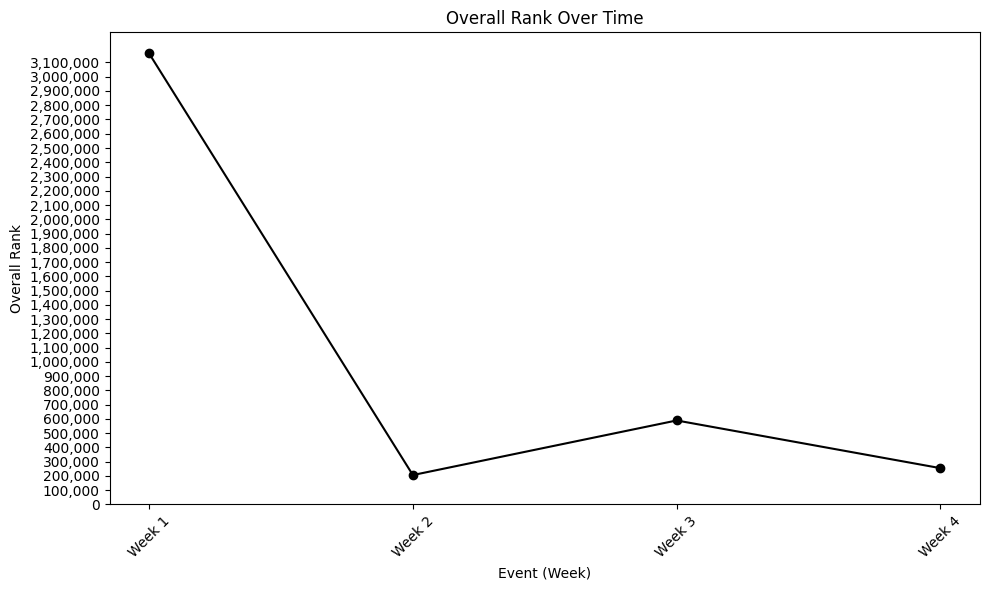

In [12]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Function to format y-axis labels as "x,xxx,xxx"
def y_axis_formatter(value, pos):
    return f"{int(value):,}"

# Create the line chart with a white background and a black line
plt.figure(figsize=(10, 6))
plt.plot(df["event"], df["overall_rank"], marker='o', linestyle='-', color='black')  # Set line color to black

# Set the y-axis formatter and tick increments
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(y_axis_formatter))
ax.set_yticks(range(0, int(df["overall_rank"].max()) + 1, 100000))  # Increment of 100,000

plt.xlabel("Event (Week)")
plt.ylabel("Overall Rank")
plt.title("Overall Rank Over Time")

# Remove gridlines
ax.grid(False)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



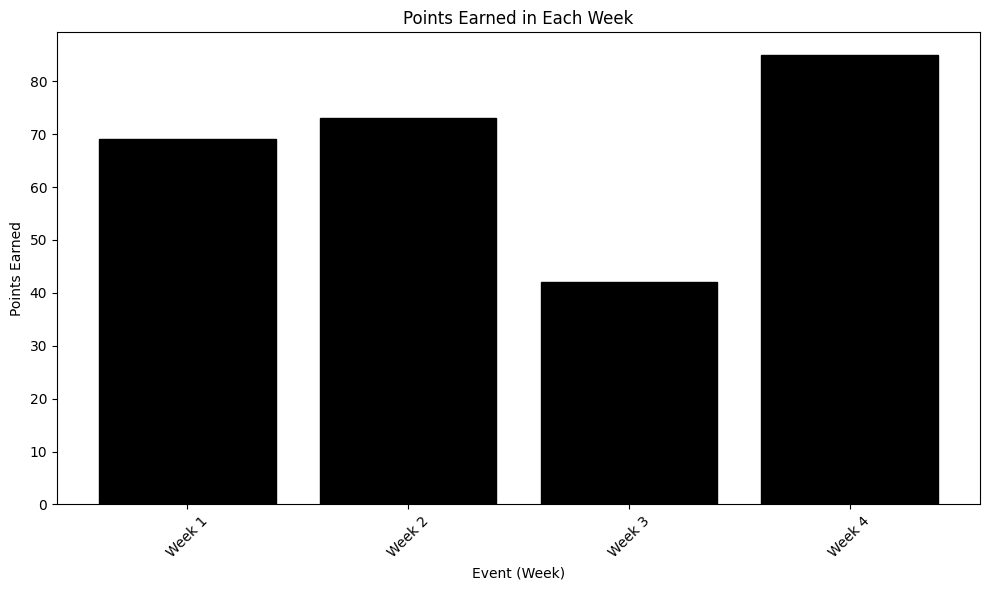

In [13]:
# Create the bar chart with black bars and a white background
plt.figure(figsize=(10, 6))
bars = plt.bar(df["event"], df["points"], color='black')  # Set bar color to black

# Set the background color to white
ax = plt.gca()
ax.set_facecolor('white')

plt.xlabel("Event (Week)")
plt.ylabel("Points Earned")
plt.title("Points Earned in Each Week")

# Remove gridlines
ax.grid(False)

plt.xticks(rotation=45)
plt.tight_layout()

# Customize bar edge color (optional)
for bar in bars:
    bar.set_edgecolor('black')  # Set bar edge color to black

plt.show()



In [14]:
#Part 2 - Exploring history of previous Season finishes

# Request Library can pull a reponse from an API
history = requests.get('https://fantasy.premierleague.com/api/entry/1339013/history/').text

In [15]:
history

'{"current":[{"event":1,"points":69,"total_points":69,"rank":3163317,"rank_sort":3211397,"overall_rank":3163317,"bank":0,"value":1000,"event_transfers":0,"event_transfers_cost":0,"points_on_bench":5},{"event":2,"points":73,"total_points":142,"rank":84645,"rank_sort":85705,"overall_rank":206434,"bank":0,"value":1002,"event_transfers":0,"event_transfers_cost":0,"points_on_bench":10},{"event":3,"points":42,"total_points":184,"rank":5181362,"rank_sort":5194369,"overall_rank":589331,"bank":9,"value":1007,"event_transfers":2,"event_transfers_cost":0,"points_on_bench":10},{"event":4,"points":85,"total_points":269,"rank":1263083,"rank_sort":1274474,"overall_rank":254874,"bank":12,"value":1013,"event_transfers":1,"event_transfers_cost":0,"points_on_bench":5}],"past":[{"season_name":"2014/15","total_points":1975,"rank":283579},{"season_name":"2015/16","total_points":2182,"rank":59783},{"season_name":"2016/17","total_points":2099,"rank":242068},{"season_name":"2017/18","total_points":1836,"rank":

In [16]:
# removed from history
past =  [
        {"season_name": "2014/15", "total_points": 1975, "rank": 283579},
        {"season_name": "2015/16", "total_points": 2182, "rank": 59783},
        {"season_name": "2016/17", "total_points": 2099, "rank": 242068},
        {"season_name": "2017/18", "total_points": 1836, "rank": 2531025},
        {"season_name": "2018/19", "total_points": 2224, "rank": 196212},
        {"season_name": "2019/20", "total_points": 2202, "rank": 286888},
        {"season_name": "2020/21", "total_points": 2275, "rank": 473155},
        {"season_name": "2021/22", "total_points": 2385, "rank": 349653},
        {"season_name": "2022/23", "total_points": 2465, "rank": 296918}
]

In [17]:
# Create a DataFrame from the "past" data
past_df = pd.DataFrame(past)

past_df

,season_name,total_points,rank
0,2014/15,1975,283579
1,2015/16,2182,59783
2,2016/17,2099,242068
3,2017/18,1836,2531025
4,2018/19,2224,196212
5,2019/20,2202,286888
6,2020/21,2275,473155
7,2021/22,2385,349653
8,2022/23,2465,296918


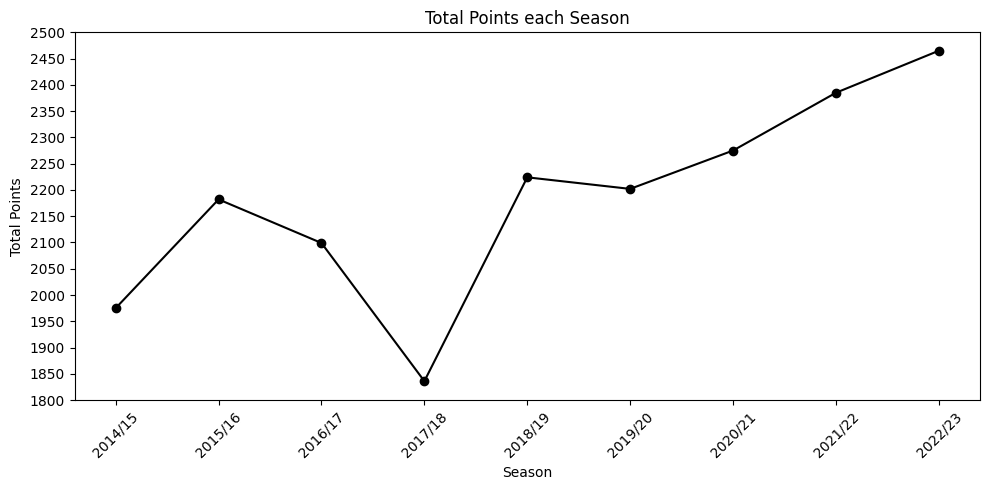

In [18]:
import matplotlib.pyplot as plt

# Create the first line chart with points on the y-axis and season on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(past_df["season_name"], past_df["total_points"], marker='o', linestyle='-', color='black')  # Set line color to black
plt.title("Total Points each Season")
plt.xlabel("Season")
plt.ylabel("Total Points")
plt.grid(False)  # Remove grid lines
plt.gca().set_facecolor('white')  # Set background color to white

# Set y-axis increments to 75
plt.yticks(range(1800, max(past_df["total_points"]) + 50, 50))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the first line chart
plt.tight_layout()
plt.show()


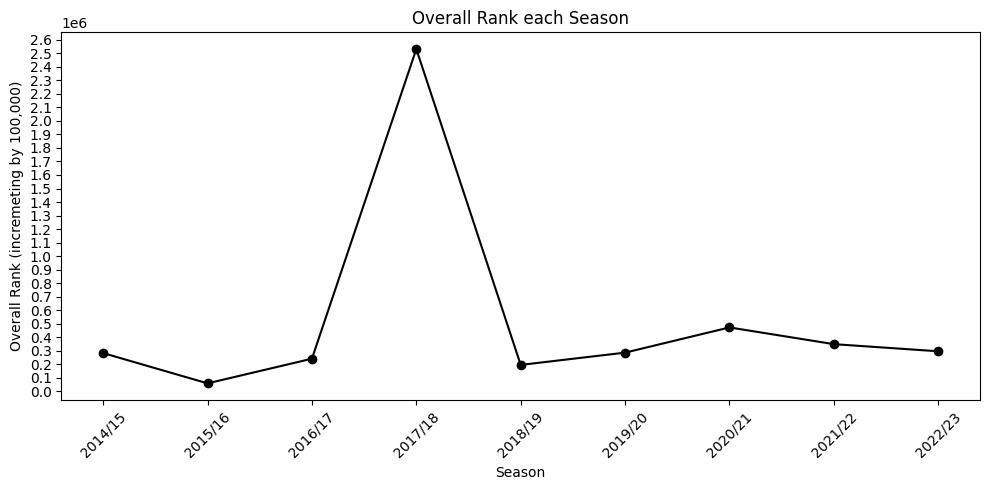

In [19]:
# Create the second line chart with rank on the y-axis and season on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(past_df["season_name"], past_df["rank"], marker='o', linestyle='-', color='black')  # Set line color to black
plt.title("Overall Rank each Season")
plt.xlabel("Season")
plt.ylabel("Overall Rank (incremeting by 100,000)")
plt.grid(False)  # Remove grid lines
plt.gca().set_facecolor('white')  # Set background color to white

# Set y-axis increments to 100,000
#Using le6 as values too large to be diplayed (in the millions)
plt.yticks(range(0, max(past_df["rank"]) + 100000, 100000))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the second line chart
plt.tight_layout()
plt.show()

In [31]:
# Count the number of seasons
season_count = past_df["season_name"].nunique()

matches = 38
total_matches = matches * season_count

# Get the maximum "total_points" from the best performing season
max_total_points = past_df["total_points"].max()

best_season = max_total_points / matches

# Sum up all the total points from every season
total_points_sum = past_df["total_points"].sum()

avg_all_seasons = total_points_sum / total_matches

# Obtain the absolute value and round to the nearest integer
best_season_avg_week = int(abs(best_season))

# Obtain the absolute value and round to the nearest integer
all_seasons_avg_week = int(abs(avg_all_seasons))

# Printing the absolute value as an integer
print(best_season_avg_week)
print(all_seasons_avg_week)

64
57


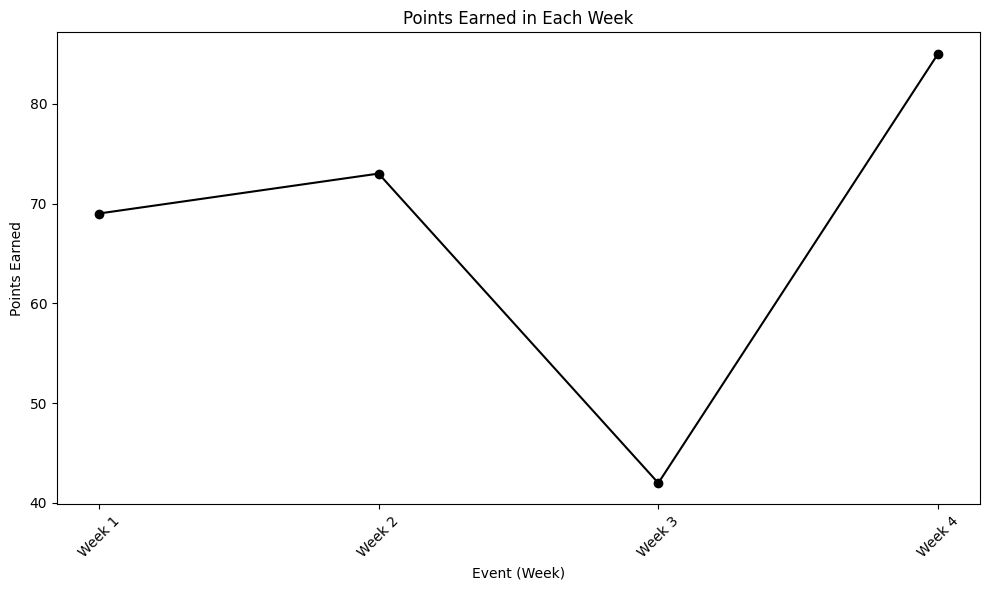

In [32]:
# Create the line chart with black line and a white background
plt.figure(figsize=(10, 6))
plt.plot(df["event"], df["points"], marker='o', linestyle='-', color='black')  # Set line color to black

# Set the background color to white
ax = plt.gca()
ax.set_facecolor('white')

plt.xlabel("Week")
plt.ylabel("Points Earned")
plt.title("Points Earned in Each Week")

# Remove gridlines
ax.grid(False)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


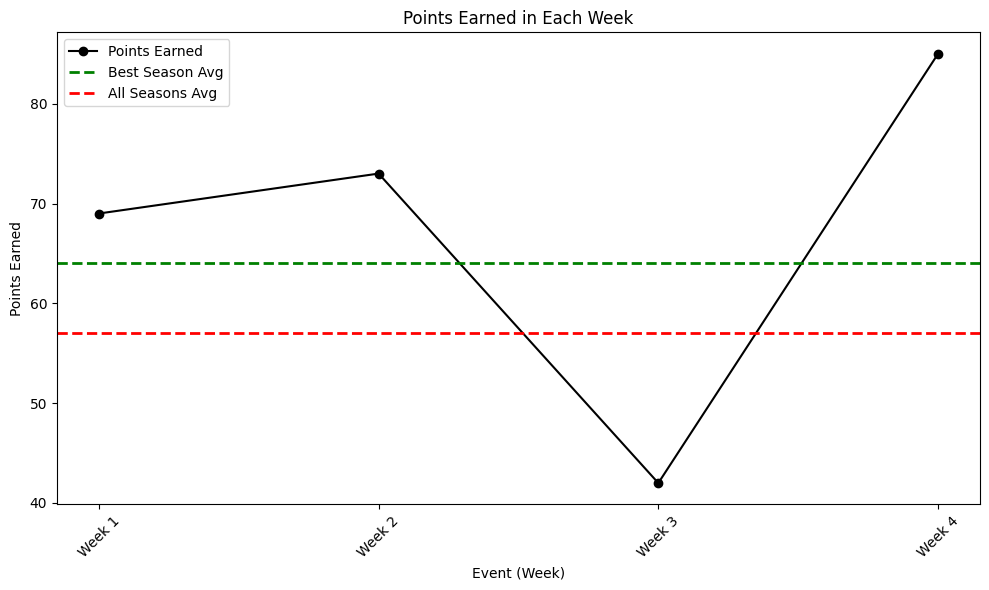

In [33]:
# Create the line chart with a white background
plt.figure(figsize=(10, 6))

# Plot the points earned as a line chart
plt.plot(df["event"], df["points"], marker='o', linestyle='-', color='black', label='Points Earned')

# Add a green dashed line for best_season_avg_week
plt.axhline(y=best_season_avg_week, color='green', linestyle='--', label='Best Season Avg', linewidth=2)

# Add a red dashed line for all_seasons_avg_week
plt.axhline(y=all_seasons_avg_week, color='red', linestyle='--', label='All Seasons Avg', linewidth=2)

# Set the background color to white
ax = plt.gca()
ax.set_facecolor('white')

plt.xlabel("Week")
plt.ylabel("Points Earned")
plt.title("Points Earned in Each Week")

plt.grid(False)

plt.xticks(rotation=45)
plt.tight_layout()

# Add a legend
plt.legend()

plt.show()
